In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas
!pip install rioxarray
!pip install pygrib

In [17]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray as xr
import rasterio as rio
import pygrib

%matplotlib inline

In [167]:
poligono_path = '/content/drive/MyDrive/Entregas/col_admbnda_adm1_mgn_20200416.shp'
poligono      = gpd.read_file(poligono_path)

In [118]:
archivos_tif = ['/content/drive/MyDrive/Entregas/NDVI_2022_4.tif', '/content/drive/MyDrive/Entregas/Precipitacion.tif']

dataset = rio.open('/content/drive/MyDrive/Entregas/Precipitacion.tif')
image_array = dataset.read()
transform = dataset.transform
rows, cols = np.indices((dataset.height, dataset.width))
lon, lat = rio.transform.xy(transform, rows.flatten(), cols.flatten())

image_array = image_array.squeeze()

dataset.close()

dataset = rio.open(j)
image_array_2 = dataset.read()
transform = dataset.transform
rows, cols = np.indices((dataset.height, dataset.width))
lon, lat = rio.transform.xy(transform, rows.flatten(), cols.flatten())

image_array_2 = image_array_2.squeeze()

df = pd.DataFrame({
    'Value NDVI': image_array.flatten(),
    'Latitude': lat,
    'Longitude': lon
})

dataset.close()

dataframe = pd.DataFrame({
    'Value NDVI': image_array.flatten(),
    'Value ppt': image_array.flatten(),
    'Latitude': lat,
    'Longitude': lon
})

print(dataframe.dropna())
merged_df = dataframe.dropna()

      Value NDVI  Value ppt   Latitude  Longitude
58      0.323162   0.323162  11.633183 -71.999970
116     0.306031   0.306031  11.543351 -72.179633
117     0.316896   0.316896  11.543351 -72.089802
118     0.386332   0.386332  11.543351 -71.999970
174     0.298212   0.298212  11.453520 -72.359296
...          ...        ...        ...        ...
7625    0.621082   0.621082   0.224579 -76.761041
7626    0.619574   0.619574   0.224579 -76.671209
7627    0.607079   0.607079   0.224579 -76.581378
7628    0.640398   0.640398   0.224579 -76.491546
7629    0.640398   0.640398   0.224579 -76.401715

[2980 rows x 4 columns]


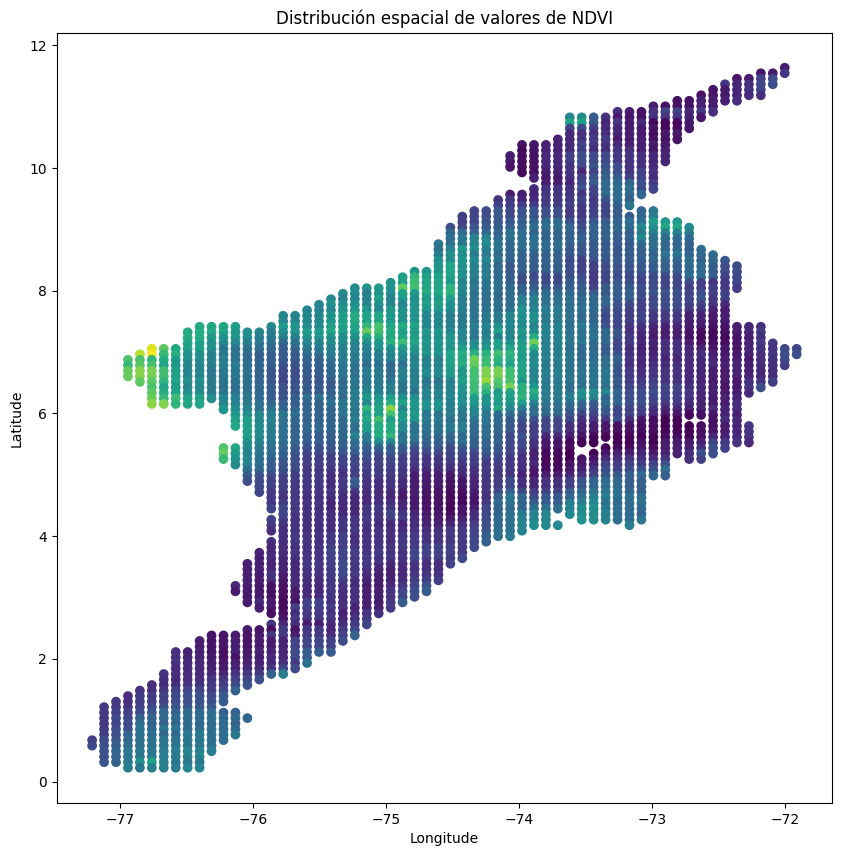

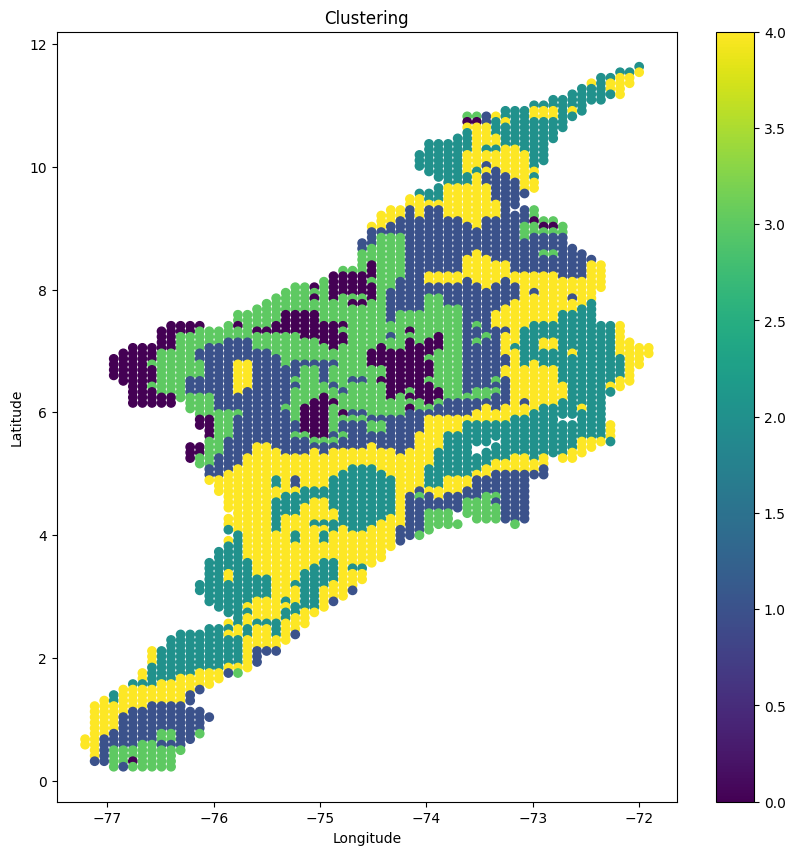

Series([], Name: Value ppt, dtype: float32)


In [138]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(merged_df['Longitude'], merged_df['Latitude'], c=merged_df['Value NDVI'], cmap='viridis')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Distribución espacial de valores de NDVI')
plt.show()

# Spatial Clustering
kmeans = KMeans(n_clusters=5)
merged_df['Cluster'] = kmeans.fit_predict(merged_df[['Value NDVI', 'Value ppt']])

# Spatial Aggregation
shapefile_path = '/content/drive/MyDrive/Entregas/Datos/Andes/andes.shp'
regions_gdf = gpd.read_file(shapefile_path)
merged_gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['Value NDVI'], merged_df['Value ppt']))
aggregated_df = gpd.sjoin(merged_gdf, regions_gdf, op='within', how='left')

# Spatial Visualization with Aggregation
fig, ax = plt.subplots(figsize=(10, 10))
scatter = ax.scatter(merged_df['Longitude'], merged_df['Latitude'], c=merged_df['Cluster'], cmap='viridis')

cbar = plt.colorbar(scatter)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Clustering')
plt.show()

# Geospatial Statistics
mean_by_region = aggregated_df.groupby('REGION')['Value ppt'].mean()
print(mean_by_region)

# Additional Geospatial Analysis and Techniques can be applied based on your requirements


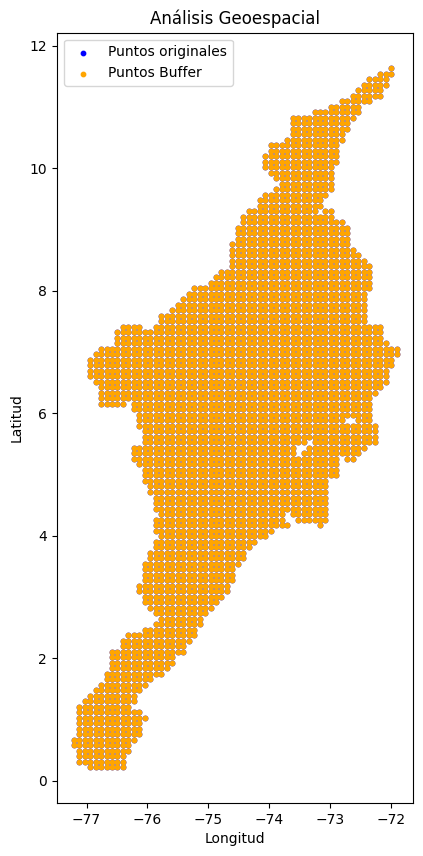

In [139]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


df = merged_df
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

gdf.crs = 'EPSG:4326'

buffer_distance = 0.01
buffered_points_gdf = gpd.GeoDataFrame(geometry=buffered_points)

points_within_buffer = gpd.sjoin(gdf, buffered_points_gdf, op='within')
average_ndvi = points_within_buffer['Value NDVI'].mean()

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, markersize=10, color='blue')
buffered_points.plot(ax=ax, alpha=0.3, color='red')
points_within_buffer.plot(ax=ax, markersize=10, color='orange')
plt.title('Análisis Geoespacial')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(['Puntos originales', 'Puntos Buffer', 'Points Within Buffer'])
plt.show()

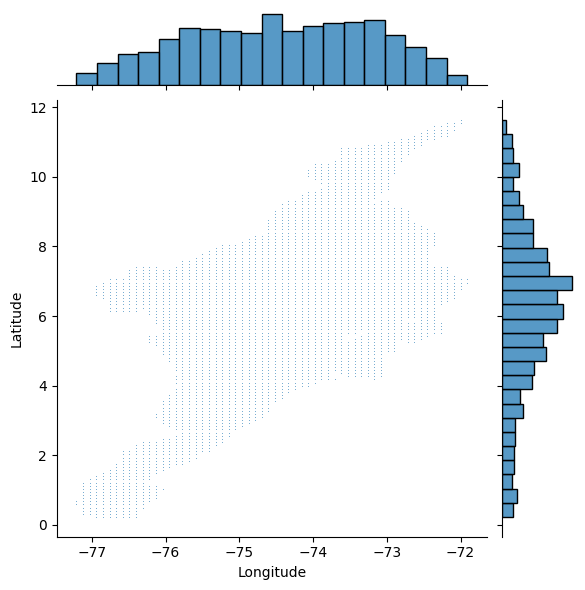

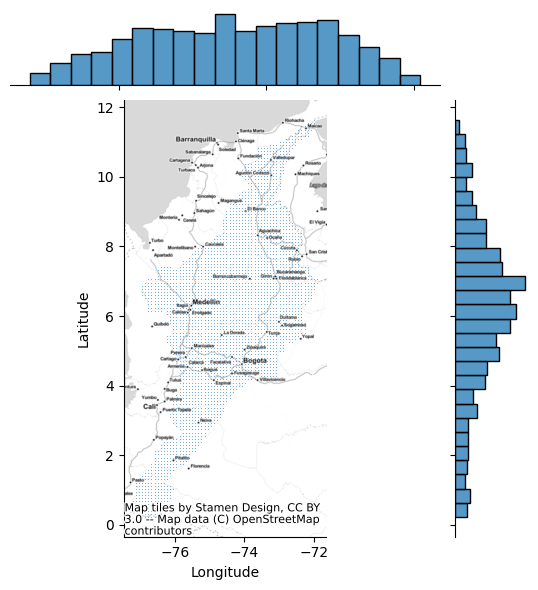

In [146]:
import seaborn as sbn
import contextily as ctx

sbn.jointplot(x='Longitude', y='Latitude', data=df, s=0.5)

joint_axes = sbn.jointplot(x='Longitude', y='Latitude', data=df, s=0.5)
# Add dark basemap
ctx.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=ctx.providers.Stamen.TonerLite
);

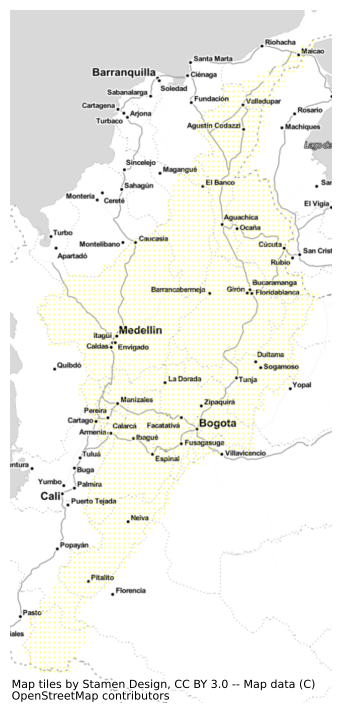

In [147]:
# Plot photographs with smaller, more translucent dots
ax = df.plot.scatter("Longitude",
                        "Latitude",
                        s=0.25,
                        c="xkcd:bright yellow",
                        alpha=0.5,
                        figsize=(9, 9)
                       )
# remove axis
ax.set_axis_off()
# Add dark basemap
ctx.add_basemap(ax,
               crs="EPSG:4326",
               source=ctx.providers.Stamen.TonerLite
              )

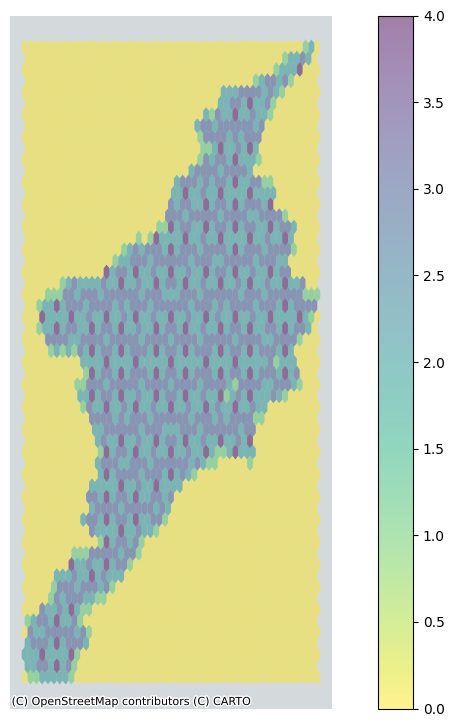

In [155]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each dimension, no borderlines, half transparency, and the reverse viridis colormap
hb = ax.hexbin(
    df['Longitude'],
    df['Latitude'],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap='viridis_r'
)
# Add basemap
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

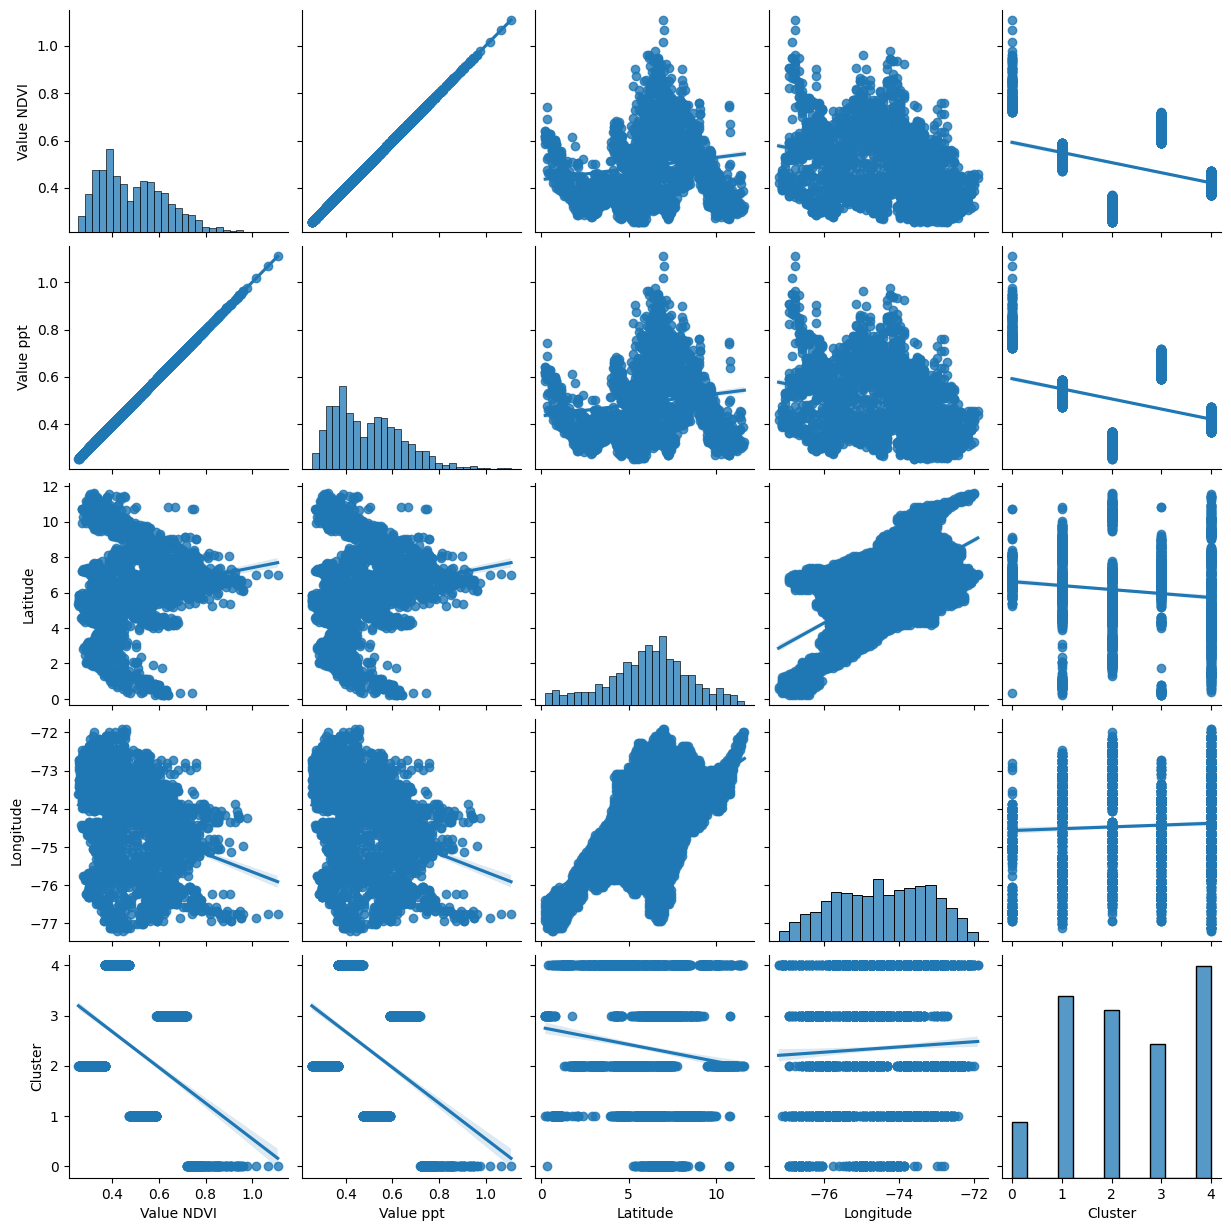

In [161]:
datos = sbn.pairplot(df, kind='reg', diag_kind='hist')

In [172]:
!pip install skystat

ERROR: Could not find a version that satisfies the requirement skystat (from versions: none)
ERROR: No matching distribution found for skystat


In [171]:
import skgstat as skg
from skgstat import Variogram, OrdinaryKriging

V = Variogram(df[['Longitude', 'Latitude']].values, df.values, estimator="entropy", model="spherical", maxlag=60, n_lags=20)
V.plot();

ModuleNotFoundError: ignored

AttributeError: ignored

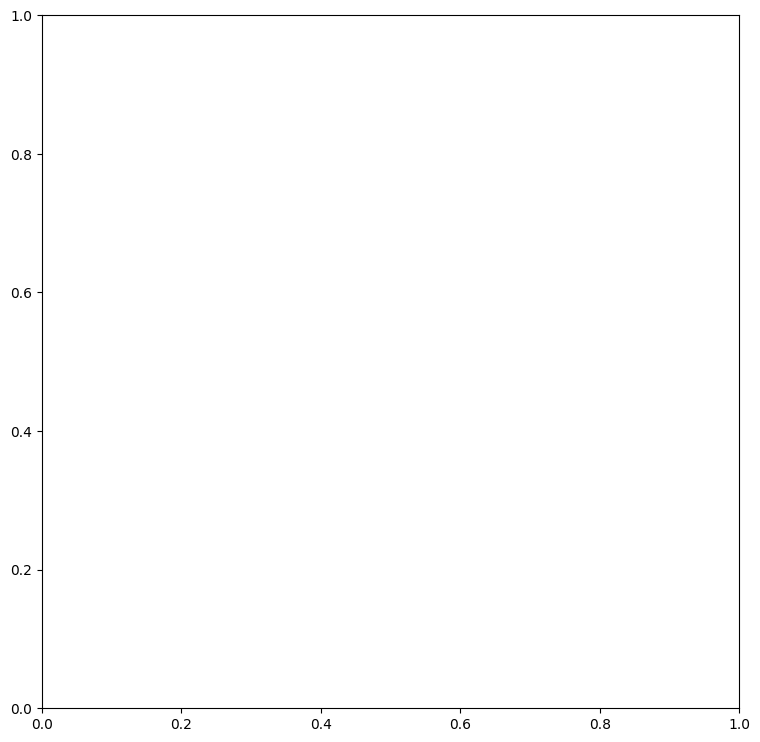

In [168]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot % to leave
df.plot(column='Value NDVI', scheme='Quantiles', legend=True, ax=ax)
# Remove axis frame
ax.set_axis_off()
# Change background color of the figure
f.set_facecolor('0.75')
# Title
f.suptitle('% to Leave', size=30)
# Draw
plt.show()